In [1]:
#
#  This notebook provides example for plotting from the text files saved by the psd.py utility.
#  You'll need to provide a "raw_waveforms.txt" file in the directory where you are running this notebook.
#

In [2]:
%pylab inline

# signal package needed for producing periodograms
from scipy import signal

Populating the interactive namespace from numpy and matplotlib


In [3]:
# a function to parse text files into time and voltage values,
#   (also determines the number of runs and sampling frequency)
# returns tuple containing nruns, fsamp, time values, voltage values
#   (time values and voltage values are 2D arrays [nruns,nsamples])

def read_text_file(file):
    txtdat = np.loadtxt(file)
    if (txtdat.ndim == 1):
        txtdat = np.reshape(txtdat, (1,-1))
    nruns = txtdat.shape[0]    
    nsamp = txtdat.shape[1]//2
    print("INFO: found data for ", nruns, " runs.")
    print("INFO: number of sample times is ", nsamp, "(expecting 1538).")
    t = txtdat[...,:nsamp]  # ms
    v = txtdat[...,nsamp:]  # mV
    fsamp = 1.0/(t[0,1]-t[0,0])
    print("INFO:  sample frequency is ", fsamp, " kHz (expecting 76.9 kHz)")
    return nruns,fsamp,t,v
    

INFO: found data for  10  runs.
INFO: number of sample times is  1538 (expecting 1538).
INFO:  sample frequency is  76.9  kHz (expecting 76.9 kHz)


Text(0,0.5,'Voltage (mV)')

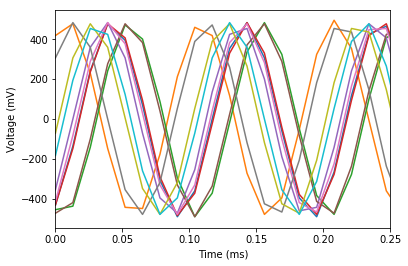

In [4]:
# example for plotting time series data for all runs:

nruns,fsamp,t,v = read_text_file("raw_waveforms.txt")

for i in range(nruns):
    plt.plot(t[i],v[i])

# zoom in on a small portion of time range so you can see the shape:
plt.xlim(0,0.25)
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (mV)")

INFO: found data for  10  runs.
INFO: number of sample times is  1538 (expecting 1538).
INFO:  sample frequency is  76.9  kHz (expecting 76.9 kHz)
peak at  10.0  kHz


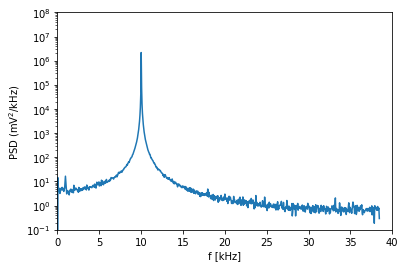

In [5]:
# example power spectral density, averaging over all available runs:

nruns,fsamp,t,v = read_text_file("raw_waveforms.txt")

# use periodogram function from signal to produce periodogram of time series data in v.
f, psd = signal.periodogram(v, fsamp)
psd = np.average(psd,axis=0)

plt.plot(f,psd,label="data")
plt.semilogy()
plt.xlim(0,40.0)
plt.ylim(0.1,1E8)
plt.xlabel("f [kHz]")
plt.ylabel("PSD (${\\rm mV}^2/{\\rm kHz}$)")

# example finding peak in PSD:
fmax = f[np.argmax(psd)]
print("peak at ", fmax, " kHz")


Text(0,0.5,'PSD (${\\rm mV}^2/{\\rm kHz}$)')

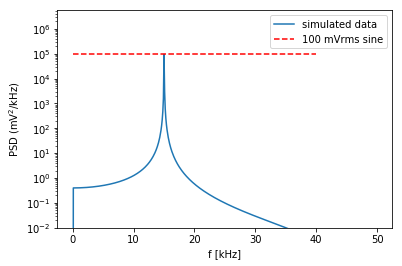

In [6]:
# Example showing relationship between amplitude of a sine wave,
# and the magnitude of the power spectral density, using simulated 
# data.

nsamp = 1000
fsamp = 100 # kHz
T     = nsamp / fsamp
t = np.linspace(0,T,1000)
freq = 15.0 # kHz
arms = 100 # mV (RMS)

v = (2**0.5 * arms) * np.cos(2*pi*freq*t)
f, psd = signal.periodogram(v, fsamp)
plt.plot(f,psd,label="simulated data")

# draw a benchmark PSD value for a 100 mV rms sine wave
#  it's simple T * Vrms^2
vbm = 100
bmy = T * vbm**2 

plt.plot([0,40],[bmy,bmy],"r--", label="100 mVrms sine")

plt.semilogy()
plt.ylim(0.01)
plt.legend()

plt.xlabel("f [kHz]")
plt.ylabel("PSD (${\\rm mV}^2/{\\rm kHz}$)")